170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 832s 5us/step


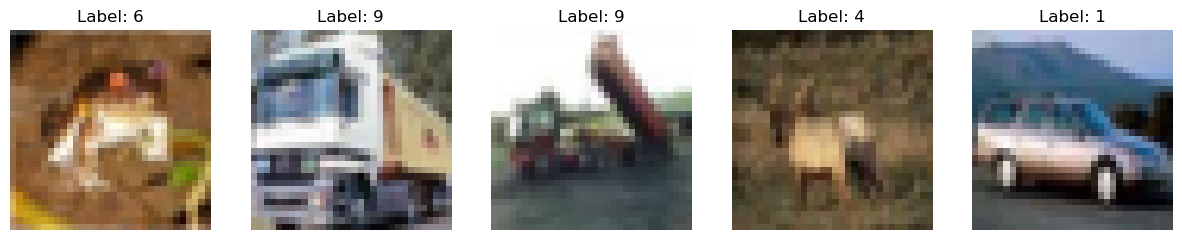

In [5]:
# Install additional libraries if required
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (training and testing)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1] for better training performance
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display a few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Label: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()


In [6]:
from tensorflow.keras import layers, models

def create_cnn_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(32, 32, 3)),
        
        # Convolutional Layers
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and Fully Connected Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    
    return model

# Create the model
model = create_cnn_model()

# Compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\Neha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model on the CIFAR-10 training data
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.3812 - loss: 1.6925 - val_accuracy: 0.5906 - val_loss: 1.1531
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6384 - loss: 1.0341 - val_accuracy: 0.6655 - val_loss: 0.9584
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.7107 - loss: 0.8308 - val_accuracy: 0.7184 - val_loss: 0.8209
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7528 - loss: 0.7190 - val_accuracy: 0.7245 - val_loss: 0.8095
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7872 - loss: 0.6126 - val_accuracy: 0.7340 - val_loss: 0.7930
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8137 - loss: 0.5367 - val_accuracy: 0.7313 - val_loss: 0.8112
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8428 - loss: 0.4512 - val_accuracy: 0.7502 - val_loss: 0.7820
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8616 - loss: 0.3933 - 

In [8]:
# Evaluate the trained model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 3s - 11ms/step - accuracy: 0.7467 - loss: 0.9249
Test accuracy: 0.7466999888420105


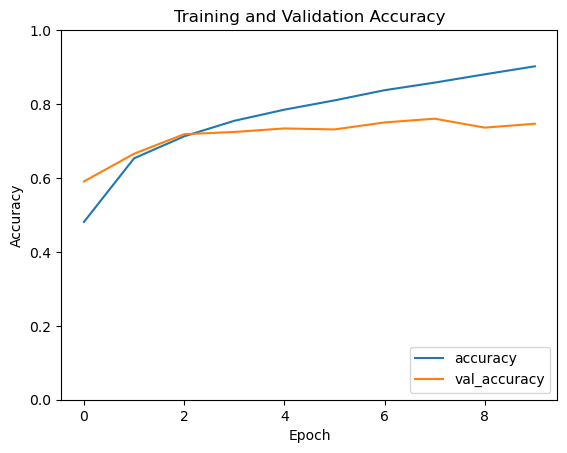

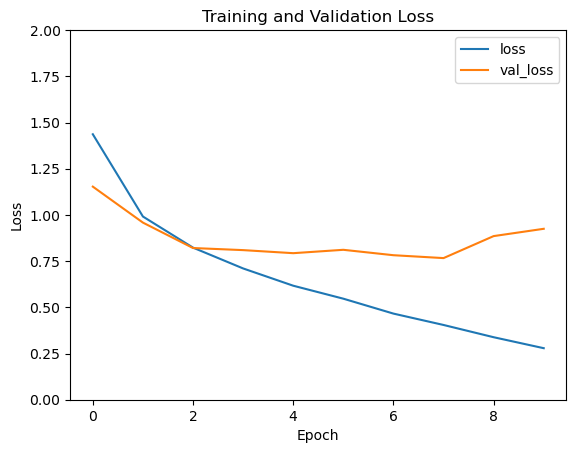

In [9]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


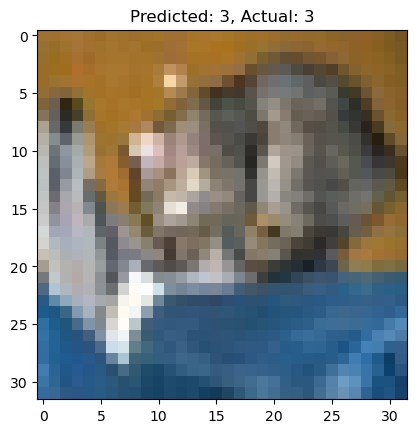

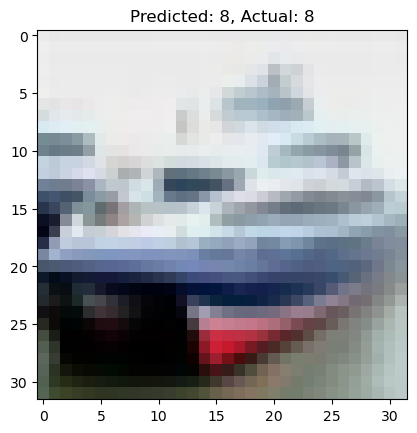

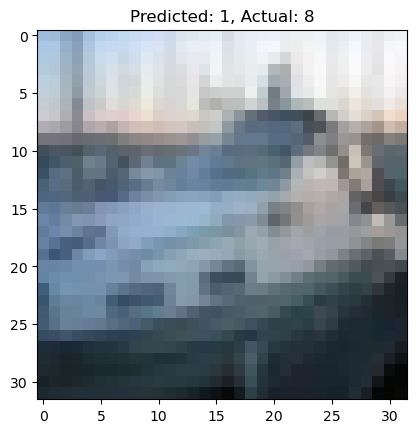

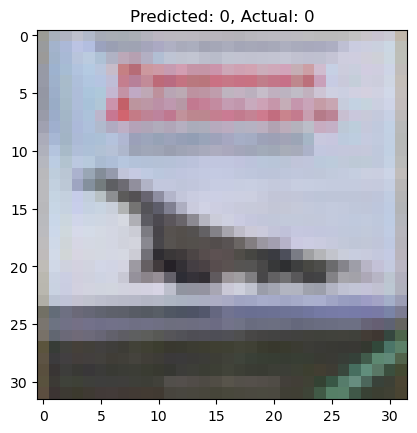

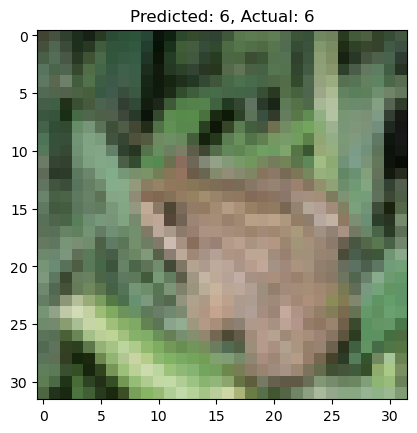

In [10]:
# Get predictions for the test set
predictions = model.predict(x_test)

# Display the first 5 predictions along with actual labels
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i][0]}")
    plt.show()


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the generator model
def build_generator():
    model = models.Sequential([
        layers.InputLayer(input_shape=(32, 32, 1)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.UpSampling2D(size=(2, 2)),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.UpSampling2D(size=(2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')
    ])
    return model

# Instantiate the generator
generator = build_generator()

# Print the model summary
generator.summary()


C:\Users\Neha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 3)         │           6,915 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,579 (1.44 MB)

 Trainable params: 376,579 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
import pandas as pd

# Load the CSV file to inspect its contents
sample_submission = pd.read_csv('sampleSubmission.csv')

# Display the first few rows to understand its structure
print(sample_submission.head())


   id label
0   1   cat
1   2   cat
2   3   cat
3   4   cat
4   5   cat


In [68]:
pip install py7zr


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image

# Paths to the extracted folders
train_folder = 'C:\\Users\\Neha\\Downloads\\Final Task\\New folder\\train'
test_folder = 'C:\\Users\\Neha\\Downloads\\Final Task\\New folder\\test'
labels_path = 'trainLabels.csv'

# Load the labels
labels_df = pd.read_csv(labels_path)
train_labels = labels_df['label'].values

# Function to load and preprocess images
def load_images_from_folder(folder_path, img_size=(32, 32)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB
        img = img.resize(img_size)  # Resize to (32, 32)
        img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load training and test images
train_images = load_images_from_folder(train_folder)
test_images = load_images_from_folder(test_folder)

print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Training images shape: (50000, 32, 32, 3)
Test images shape: (300000, 32, 32, 3)


In [2]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_onehot = np.eye(len(label_encoder.classes_))[train_labels_encoded]

print(f"One-hot encoded training labels shape: {train_labels_onehot.shape}")


One-hot encoded training labels shape: (50000, 10)


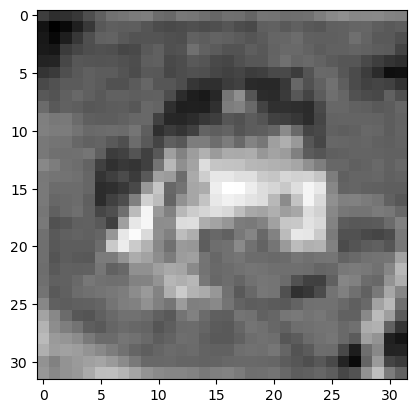

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert RGB images to grayscale
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

# Display a sample grayscale image
plt.imshow(x_train_gray[0], cmap='gray')
plt.show()


In [ ]:
def train_gan(generator, discriminator, gan, x_train_gray, x_train):
    batch_size = 64
    epochs = 10000
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, x_train_gray.shape[0], half_batch)
        real_images = x_train[idx]
        fake_images = generator.predict(x_train_gray[idx])

        # Labels for real and fake images
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        idx = np.random.randint(0, x_train_gray.shape[0], batch_size)
        g_loss = gan.train_on_batch(x_train_gray[idx], real_labels)

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

train_gan(generator, discriminator, gan, x_train_gray, x_train)


In [ ]:
# Select a few grayscale images from the test set
n_samples = 5
sample_gray_images = x_test_gray[:n_samples]
sample_original_images = x_test[:n_samples]

# Predict the colorized images
colorized_images = generator.predict(sample_gray_images)

# Display the grayscale and colorized images
fig, axes = plt.subplots(n_samples, 3, figsize=(10, 10))
for i in range(n_samples):
    axes[i, 0].imshow(sample_gray_images[i], cmap='gray')
    axes[i, 1].imshow(sample_original_images[i])
    axes[i, 2].imshow(colorized_images[i])
    axes[i, 0].set_title("Grayscale")
    axes[i, 1].set_title("Original")
    axes[i, 2].set_title("Colorized")
    for ax in axes[i]:
        ax.axis('off')
plt.tight_layout()
plt.show()
